In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
arch=resnext50

# Checking solution where training set = test set(Just checking!!!)

In [4]:
PATH = "final_data1/user7/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [5]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="train", bs =10)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.746833   38.829566  0.511111  



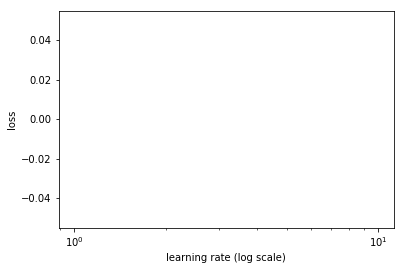

In [6]:
lrf=learn.lr_find()
learn.sched.plot()

In [7]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.565567   0.413381   0.777778  
    1      0.425224   0.30419    0.8             
    2      0.333598   0.181429   0.933333        
    3      0.29613    0.073034   1.0             
    4      0.240833   0.063693   1.0             



[array([0.06369]), 1.0]

In [8]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.243563   0.056267   1.0       
    1      0.17115    0.045051   1.0             
    2      0.193365   0.032005   1.0             
    3      0.175796   0.021431   1.0             
    4      0.146653   0.017492   1.0             



[array([0.01749]), 1.0]

In [10]:
log_preds,y = learn.TTA(n_aug=1)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

1.0

[[22  0]
 [ 0 23]]


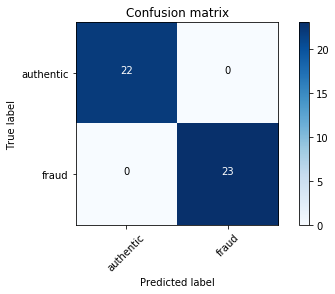

In [11]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

# Real Deal!

In [30]:
PATH = "final_data1/user7/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [31]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="test", bs =10)
learn = ConvLearner.pretrained(arch, data, precompute=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.731418   14.201217  0.571429  



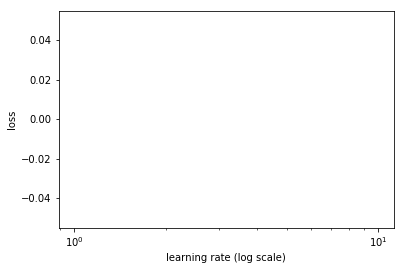

In [32]:
lrf=learn.lr_find()
learn.sched.plot()

In [34]:
learn.fit(0.1, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy       
    0      15.869596  4.093668   0.785714  
    1      10.511214  4.067004   0.714286       
    2      6.938498   6.769211   0.75           
    3      5.837599   9.446292   0.642857       
    4      5.127449   6.851217   0.785714       



[array([6.85122]), 0.7857142814568111]

In [43]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy           
    0      0.264054   4.723928   0.821429  
    1      0.856178   4.776225   0.821429        
    2      0.54211    5.777374   0.892857        
    3      0.811034   6.166972   0.892857        
    4      0.673595   5.952693   0.892857        



[array([5.95269]), 0.8928571343421936]

In [37]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy           
    0      1.314852   5.973008   0.857143  
    1      0.630621   5.888216   0.857143        
    2      1.254166   6.478653   0.857143        
    3      1.258275   6.408879   0.857143       
    4      1.288133   6.128623   0.857143       



[array([6.12862]), 0.8571428401129586]

In [42]:
learn.fit(0.0001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy           
    0      0.0        4.694017   0.821429  
    1      0.000111   4.58166    0.821429           
    2      0.349162   4.668815   0.821429           
    3      0.874529   4.911412   0.821429        
    4      0.78542    4.823489   0.821429        



[array([4.82349]), 0.8214285799435207]

In [39]:
learn.fit(0.01, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy    
    0      0.0        6.391356   0.857143  
    1      1.647719   6.901505   0.857143        
    2      2.562196   7.132306   0.857143       
    3      1.992253   7.047109   0.892857       
    4      3.068143   7.469192   0.892857       
    5      2.677966   6.596413   0.892857       
    6      2.170403   6.039118   0.821429       
    7      2.576047   5.987397   0.821429       
    8      2.519832   5.452285   0.857143       
    9      2.422689   5.44679    0.785714       
    10     2.298656   5.274082   0.785714       
    11     1.984569   4.862394   0.857143       
    12     1.922468   4.693717   0.785714       



[array([4.69372]), 0.785714294229235]

In [40]:
learn.fit(0.001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.696664   4.734779   0.821429  
    1      0.910497   4.790611   0.821429       
    2      0.876216   4.65407    0.857143        
    3      1.058178   4.849057   0.857143       
    4      0.919582   4.757913   0.857143        
    5      0.725193   4.982344   0.821429        
    6      0.724709   4.913399   0.821429        
    7      0.599092   4.576117   0.821429        
    8      0.616693   4.900124   0.857143        
    9      0.659839   4.594466   0.821429        
    10     0.667022   4.739415   0.821429        
    11     0.57579    4.796841   0.821429        
    12     0.500129   4.799993   0.785714        



[array([4.79999]), 0.785714294229235]

In [41]:
learn.fit(0.0001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy           
    0      0.248981   4.655449   0.821429  
    1      0.266983   4.766909   0.821429        
    2      2.081876   4.560506   0.785714        
    3      1.500942   4.762212   0.821429       
    4      1.21867    5.048039   0.785714       
    5      1.008843   4.969978   0.821429       
    6      1.068579   5.236079   0.821429        
    7      1.287397   5.188924   0.821429       
    8      1.83342    5.463604   0.857143       
    9      1.853322   5.640997   0.857143       
    10     1.68701    5.392727   0.857143       
    11     1.491752   4.971071   0.821429       
    12     1.733044   4.828215   0.821429       



[array([4.82821]), 0.8214285799435207]

In [104]:
# learn.unfreeze()
# lr = 0.001
# lrs=np.array([lr/100,lr/10,lr])
# learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

In [44]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.8928571428571429

[[14  0]
 [ 3 11]]


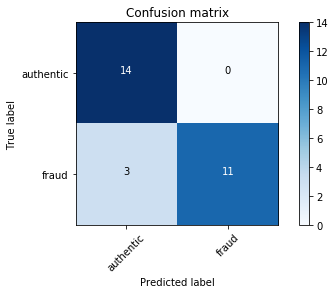

In [45]:
preds = np.argmax(probs, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [46]:
def accuracy_new(preds, targs, thres=0.5):
    preds = [int(x[1] > thres) for x in preds]
    return (preds==targs).mean()

In [47]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
highest = 0
h_acc = 0
for cut in [0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]:
    acc = accuracy_new(probs, y, cut)
    if acc > h_acc:
        h_acc = acc
        highest = cut
    print(h_acc)

0.8928571428571429                   
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429


[[14  0]
 [ 3 11]]


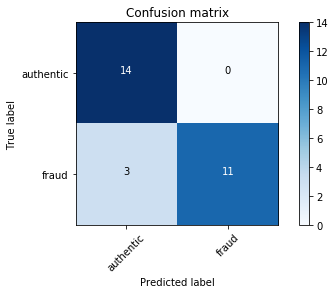

In [48]:
preds = [int(x[1] > highest) for x in probs]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)